**IMPORTING NEEDED LIBRARIES**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [17]:
!pip install f1_score

ERROR: Could not find a version that satisfies the requirement f1_score (from versions: none)
ERROR: No matching distribution found for f1_score


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [3]:
from google.colab import files

uploaded = files.upload()


Saving Insurance.csv to Insurance.csv


**LOAD DATASET**

In [4]:
data=pd.read_csv("Insurance.csv")

**DATA PREPROCESSING**

In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [6]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0
insuranceclaim,0


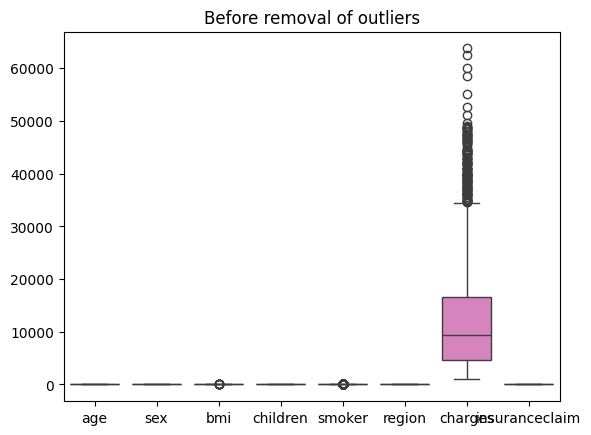

In [7]:
sns.boxplot(data=data)
plt.title('Before removal of outliers')
plt.show()


**Why we didn't remove outliers?**

Box plots were used to identify potential outliers in the dataset. However, these outliers were not removed because they represent genuine real-world cases, especially in insurance data where extreme values naturally occur. Retaining these values helps preserve data realism and improves model robustness.

**MODEL CREATION STEPS**

In [12]:
x=data[['age','sex','bmi','children','smoker','region','charges']]
y=data['insuranceclaim']

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
model=RandomForestClassifier(n_estimators=1000,random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

**CHECK FOR MODEL ACCURACY**

In [15]:
y_pred=model.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1])

In [16]:
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.9104477611940298

**GOOD FOR PREDICTION**

An accuracy of 91% indicates that the model correctly predicts the insurance claim outcome for the majority of cases, demonstrating strong predictive performance. This level of accuracy suggests that the selected features and learning algorithm effectively capture the underlying patterns in the data, making the model reliable for practical use.

In [21]:
print(classification_report(y_test,y_pred,target_names=['not claim','claim']))

              precision    recall  f1-score   support

   not claim       0.87      0.91      0.89       107
       claim       0.94      0.91      0.92       161

    accuracy                           0.91       268
   macro avg       0.91      0.91      0.91       268
weighted avg       0.91      0.91      0.91       268



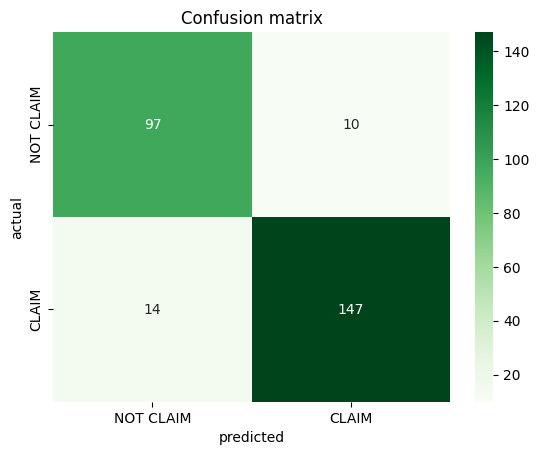

In [22]:
conf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Greens',
            xticklabels=['NOT CLAIM','CLAIM'],
            yticklabels=['NOT CLAIM','CLAIM'])
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Confusion matrix')
plt.show()

**SAVE MODEL AS PKL FILE**

In [23]:
import joblib

In [24]:
joblib.dump(model,'insurance.pkl', compress=9)

['insurance.pkl']

In [25]:
files.download('insurance.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>